# Определение перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».

Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

***

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

import seaborn as sns

sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid', rc={'ytick.left':True, 'ytick.direction':'in',
                              'xtick.bottom':True, 'xtick.direction':'in'})


Bad key text.latex.preview in file /Users/mike/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/mike/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/mike/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_qualit

***

## Содержание:
* [1. Общая информация](#section_1)
* [2. Подготовка данных](#section_2)
* [3. Помесячная выручка с каждого пользователя](#section_3)

## 1. Общая информация <a class="anchor" id="section_1"></a>

In [2]:
users_df = pd.read_csv('datasets/users.csv')
messages_df = pd.read_csv('datasets/messages.csv')
calls_df = pd.read_csv('datasets/calls.csv')
internet_df = pd.read_csv('datasets/internet.csv', )
tariffs_df = pd.read_csv('datasets/tariffs.csv')

При попытке посмотреть `calls_df.info()` вышла следующая ошибка:

`TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type`

Похожая проблема обсуждалась __[здесь](https://github.com/numpy/numpy/issues/18355)__. В итоге (загадочным образом) помогло:

`conda install pandas`

Дальше разбираться не стал.

### users

In [3]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
users_df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


- `user_id` — уникальный идентификатор пользователя

- `first_name` — имя пользователя

- `last_name` — фамилия пользователя

- `age` — возраст пользователя (годы)

- `reg_date` — дата подключения тарифа (день, месяц, год)

- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

- `city` — город проживания пользователя

- `tarif` — название тарифного плана


> Много пропусков в `churn_date`, но они объяснены в описании данных

### messages

In [5]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
messages_df.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

In [7]:
print(f'Информация по сообщениям есть для {len(messages_df.user_id.unique()) / users_df.shape[0] :.0%} пользователей')

Информация по сообщениям есть для 85% пользователей


### calls

In [8]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
calls_df.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

In [10]:
print(f'Информация по звонкам есть для {len(calls_df.user_id.unique()) / users_df.shape[0] :.0%} пользователей')

Информация по звонкам есть для 98% пользователей


### internet

In [11]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [12]:
internet_df.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

In [13]:
print(f'Информация по интернет-сессиям есть для {len(internet_df.user_id.unique()) / users_df.shape[0] :.0%} пользователей')

Информация по интернет-сессиям есть для 99% пользователей


### tariffs

In [14]:
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [15]:
tariffs_df

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [16]:
# Поиск дубликатов в данных

for df in [users_df, messages_df, calls_df, internet_df, tariffs_df]:
    print(df.duplicated().sum())

0
0
0
0
0


### Вывод

> - Дубликаты в таблицах отсутствуют
> - Требуется преобразование типов данных в некоторых колонках

## 2. Подготовка данных <a class="anchor" id="section_2"></a>

In [17]:
def date_convert(dates):
    """
    Преобразование типа данных в `dates` по шаблону

    Args:
        dates (pd.Series): Исходная колонка с датами

    Returns:
        pd.Series: Преобразованная колонка
    """    

    return pd.to_datetime(dates, format='%Y-%m-%d', errors='coerce')

In [18]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [19]:
users_df['churn_date'] = users_df['churn_date'].apply(date_convert)
users_df['reg_date'] = users_df['reg_date'].apply(date_convert)


messages_df['message_date'] = messages_df['message_date'].apply(date_convert)
# В каком месяце совершено действие?
messages_df['month'] = messages_df['message_date'].dt.month
messages_df = messages_df.rename(columns={'id': 'message_id'})

calls_df['call_date'] = calls_df['call_date'].apply(date_convert)
# В каком месяце совершено действие?
calls_df['month'] = calls_df['call_date'].dt.month
calls_df = calls_df.rename(columns={'id': 'call_id'})

internet_df['session_date'] = internet_df['session_date'].apply(date_convert)
# В каком месяце совершено действие?
internet_df['month'] = internet_df['session_date'].dt.month
internet_df = internet_df.rename(columns={'id': 'session_id'})

# Проверка
for df in [users_df, messages_df, calls_df, internet_df]:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   message_id    123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 n

❓: Заметил, что apply() работает довольно медленно. Он выполняет операции поэлементно?

В таблице `internet_df` содержится колонка, дублирующая индексы. Вероятно, при сохранении датафрейма не был установлен флаг `index=False`.

Удалю эту колонку.

In [20]:
internet_df.columns

Index(['Unnamed: 0', 'session_id', 'mb_used', 'session_date', 'user_id',
       'month'],
      dtype='object')

In [21]:
internet_df = internet_df.drop(['Unnamed: 0'], axis=1)

# Проверка
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   session_id    149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


> - Привел колонки с датами к типу datetime64 (с учетом пропусков)
> - Убрал неинформативную колонку из `internet_df`

### Округление звонков

In [22]:
calls_df

,call_id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


In [23]:
# После округления в большую сторону поменяю тип на int
calls_df['duration'] = np.ceil(calls_df['duration']).astype(int)

calls_df

,call_id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


### Объединение данных в одну таблицу

In [24]:
for df in [users_df, messages_df, calls_df, internet_df]:
    print(df.columns)

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')
Index(['message_id', 'message_date', 'user_id', 'month'], dtype='object')
Index(['call_id', 'call_date', 'duration', 'user_id', 'month'], dtype='object')
Index(['session_id', 'mb_used', 'session_date', 'user_id', 'month'], dtype='object')


In [25]:
# Назначаю индекс для упрощения представления

users_df = users_df.set_index('user_id')
messages_df = messages_df.set_index('user_id')
calls_df = calls_df.set_index('user_id')
internet_df = internet_df.set_index('user_id')

In [26]:
user_calls = users_df[['tariff']].merge(calls_df, left_index=True, right_index=True)

user_calls

,tariff,call_id,call_date,duration,month
user_id,,,,,
1000,ultra,1000_0,2018-07-25,0,7
1000,ultra,1000_1,2018-08-17,0,8
1000,ultra,1000_2,2018-06-11,3,6
1000,ultra,1000_3,2018-09-21,14,9
1000,ultra,1000_4,2018-12-15,6,12
...,...,...,...,...,...
1499,smart,1499_215,2018-12-26,1,12
1499,smart,1499_216,2018-10-18,19,10
1499,smart,1499_217,2018-11-10,11,11


## 3. Помесячная выручка с каждого пользователя <a class="anchor" id="section_3"></a>

In [27]:
# Параметры тарифов
smart_minutes_limit = 500
smart_overpay_minute = 3

ultra_minutes_limit = 3000
ultra_overpay_minute = 1

### 3.1 Количество сделанных звонков и израсходованных минут разговора по месяцам

Сначала разберусь с пользователями тарифа `smart`:

In [28]:
def calls_revenue(calls_tarif_df,
                  minutes_tariff,
                  overpay_minute):
    """
    Вычисляет суммарную выручку за звонки

    Args:
        calls_tarif_df (_type_): _description_
        minutes_tariff (_type_): _description_
        overpay_minute (_type_): _description_
        tariff_payment (_type_): _description_

    Returns:
        _type_: _description_
    """

    # Количество звонков и их совокупная длительность
    calls_stat_df = (
        calls_tarif_df
        .groupby([calls_tarif_df.index, 'month'])['duration']
        .agg(['count', 'sum'])
        )

    calls_stat_df.columns = ['calls_count', 'total_duration']

    # Остаток по минутам
    calls_stat_df['minutes_left'] = minutes_tariff - calls_stat_df['total_duration']

    # Перебор по минутам
    minutes_left = calls_stat_df['minutes_left']
    calls_stat_df['minutes_over'] = np.where(minutes_left < 0, minutes_left, 0)
    calls_stat_df['minutes_over'] = calls_stat_df['minutes_over'].abs()

    # Переплата по минутам
    calls_stat_df['call_overpay'] = calls_stat_df['minutes_over'] * overpay_minute

    return calls_stat_df

In [29]:
calls_smart_df = user_calls[user_calls['tariff']=='smart']

calls_smart_df

,tariff,call_id,call_date,duration,month
user_id,,,,,
1001,smart,1001_0,2018-11-13,11,11
1001,smart,1001_1,2018-12-14,16,12
1001,smart,1001_2,2018-11-20,3,11
1001,smart,1001_3,2018-12-27,8,12
1001,smart,1001_4,2018-11-19,20,11
...,...,...,...,...,...
1499,smart,1499_215,2018-12-26,1,12
1499,smart,1499_216,2018-10-18,19,10
1499,smart,1499_217,2018-11-10,11,11


In [30]:
smart_calls_stat_df = calls_revenue(calls_tarif_df=calls_smart_df,
                                    minutes_tariff=smart_minutes_limit,
                                    overpay_minute=smart_overpay_minute)

smart_calls_stat_df

calls_count  total_duration  minutes_left  minutes_over  \
user_id month                                                            
1001    11              59             430            70             0   
        12              63             414            86             0   
1002    6               15             117           383             0   
        7               26             214           286             0   
        8               42             289           211             0   
...                    ...             ...           ...           ...   
1498    10              41             247           253             0   
1499    9                9              70           430             0   
        10              68             449            51             0   
        11              74             612          -112           112   
        12              69             492             8             0   

               call_overpay  
user_id month                
1001    11                0  
        12                0  
1002    6                 0  
        7                 0  
        8                 0  
...                     ...  
1498    10                0  
1499    9                 0  
        10                0  
        11              336  
        12                0  

[2223 rows x 5 columns]

In [31]:
calls_ultra_df = user_calls[user_calls['tariff']=='ultra']

calls_ultra_df.shape

(72292, 5)

In [32]:
ultra_calls_stat_df = calls_revenue(calls_tarif_df=calls_ultra_df,
                                    minutes_tariff=ultra_minutes_limit,
                                    overpay_minute=ultra_overpay_minute)

ultra_calls_stat_df

calls_count  total_duration  minutes_left  minutes_over  \
user_id month                                                            
1000    5               22             159          2841             0   
        6               43             172          2828             0   
        7               47             340          2660             0   
        8               52             408          2592             0   
        9               58             466          2534             0   
...                    ...             ...           ...           ...   
1495    8               17              92          2908             0   
        9              112             813          2187             0   
        10             152            1030          1970             0   
        11             129             954          2046             0   
        12             155            1031          1969             0   

               call_overpay  
user_id month                
1000    5                 0  
        6                 0  
        7                 0  
        8                 0  
        9                 0  
...                     ...  
1495    8                 0  
        9                 0  
        10                0  
        11                0  
        12                0  

[951 rows x 5 columns]

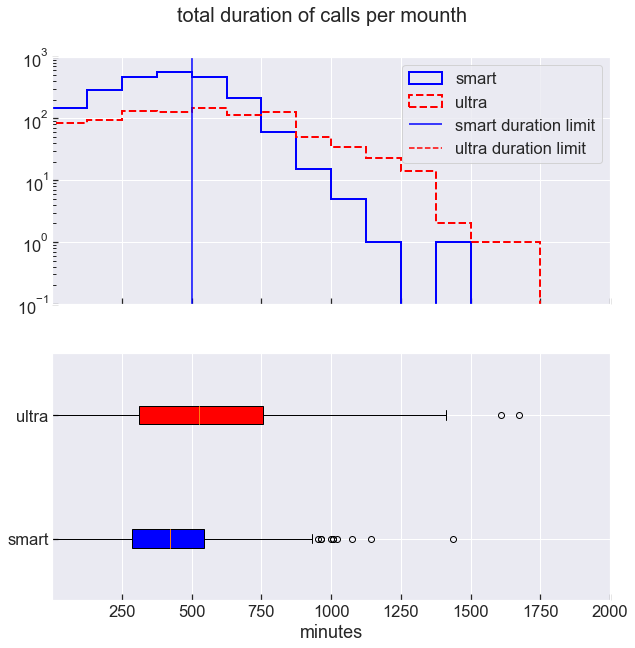

In [108]:
fig, (ax, ax1) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

space = np.linspace(0, 1750, 15)

ax.hist(smart_calls_stat_df['total_duration'], histtype='step',
        color='blue', bins=space, lw=2, label='smart')
ax.hist(ultra_calls_stat_df['total_duration'], histtype='step',
        color='red', bins=space, lw=2, ls='--', label='ultra')



ax.vlines(smart_minutes_limit, 0, 1e3, color='blue',
          label='smart duration limit')
ax.vlines(ultra_minutes_limit, 0, 1e3, color='red', ls='--',
          label='ultra duration limit')

ax.legend()
ax.set_yscale('log')

ax.set_ylim(.1, 1e3)
ax.set_xlim(.1, 2e3)

bplot = ax1.boxplot([smart_calls_stat_df['total_duration'],
                     ultra_calls_stat_df['total_duration']],
                     labels=['smart', 'ultra'], vert=False, patch_artist=True)

ax1.set_xlabel('minutes')

# fill with colors
colors = ['blue', 'red']

for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

fig.suptitle('total duration of calls per mounth', fontsize=20, y=.95)

plt.show()

- Более чем в 30% от общего количества месяцев, для которых есть данные, пользователи тарифа Смарт доплачивали за минуты сверх пакета. Такие случае отсутствуют для пользователей тарифа Ультра -- там пользователи наговаривают максимум на 56% от минут в своем пакете (3000).

### 3.2 Количество отправленных сообщений по месяцам

In [34]:
smart_sms_limit = 50
smart_sms_overpay = 3

ultra_sms_limit = 1000
ultra_sms_overpay = 1

In [35]:
user_sms_df = users_df[['tariff']].merge(messages_df, left_index=True, right_index=True)

user_sms_df

,tariff,message_id,message_date,month
user_id,,,,
1000,ultra,1000_0,2018-06-27,6
1000,ultra,1000_1,2018-10-08,10
1000,ultra,1000_2,2018-08-04,8
1000,ultra,1000_3,2018-06-16,6
1000,ultra,1000_4,2018-12-05,12
...,...,...,...,...
1499,smart,1499_179,2018-12-12,12
1499,smart,1499_180,2018-09-28,9
1499,smart,1499_181,2018-09-27,9


In [36]:
smart_sms_df = user_sms_df[user_sms_df['tariff'] == 'smart']
ultra_sms_df = user_sms_df[user_sms_df['tariff'] == 'ultra']

print(f'{smart_sms_df.shape[0]} сообщений отправлено пользователями тарифа smart')
print(f'{ultra_sms_df.shape[0]} сообщений отправлено пользователями тарифа ultra')

74413 сообщений отправлено пользователями тарифа smart
48623 сообщений отправлено пользователями тарифа ultra


In [37]:
def sms_revenue(sms_tariff_df, sms_limit, sms_overpay):

    # Количество звонков и их совокупная длительность
    sms_stat_df = (
        sms_tariff_df
        .groupby([sms_tariff_df.index, 'month'])['message_id'].count()
        )

    sms_stat_df = pd.DataFrame(sms_stat_df)
    sms_stat_df.columns = ['sms_count']

    # Остаток по сообщениям
    sms_stat_df['sms_left'] = sms_limit - sms_stat_df['sms_count']

    # Перебор по сообщениям
    sms_left = sms_stat_df['sms_left']
    sms_stat_df['sms_over'] = np.where(sms_left < 0, sms_left, 0)
    sms_stat_df['sms_over'] = sms_stat_df['sms_over'].abs()

    # Переплата по сообщениям
    sms_stat_df['sms_overpay'] = sms_stat_df['sms_over'] * sms_overpay

    return sms_stat_df

In [38]:
smart_sms_stat_df = sms_revenue(smart_sms_df,
                                sms_limit=smart_sms_limit,
                                sms_overpay=smart_sms_overpay)

smart_sms_stat_df

sms_count  sms_left  sms_over  sms_overpay
user_id month                                            
1002    6              4        46         0            0
        7             11        39         0            0
        8             13        37         0            0
        9              4        46         0            0
        10            10        40         0            0
...                  ...       ...       ...          ...
1498    10            42         8         0            0
1499    9             11        39         0            0
        10            48         2         0            0
        11            59        -9         9           27
        12            66       -16        16           48

[1922 rows x 4 columns]

In [39]:
ultra_sms_stat_df = sms_revenue(ultra_sms_df,
                                sms_limit=ultra_sms_limit,
                                sms_overpay=ultra_sms_overpay)

ultra_sms_stat_df

sms_count  sms_left  sms_over  sms_overpay
user_id month                                            
1000    5             22       978         0            0
        6             60       940         0            0
        7             75       925         0            0
        8             81       919         0            0
        9             57       943         0            0
...                  ...       ...       ...          ...
1495    8             13       987         0            0
        9             82       918         0            0
        10            82       918         0            0
        11            79       921         0            0
        12            84       916         0            0

[795 rows x 4 columns]

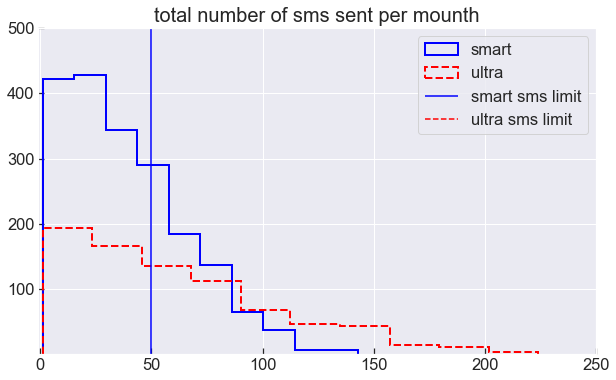

In [68]:
fig, ax = plt.subplots()

# space = np.linspace(0, 1750, 15)

ax.hist(smart_sms_stat_df['sms_count'], histtype='step',
        color='blue', lw=2, label='smart')
ax.hist(ultra_sms_stat_df['sms_count'], histtype='step',
        color='red', lw=2, ls='--', label='ultra')

ax.set_title('total number of sms sent per mounth', fontsize=20)

ax.vlines(smart_sms_limit, 0, 1e3, color='blue',
          label='smart sms limit')
ax.vlines(ultra_sms_limit, 0, 1e3, color='red', ls='--',
          label='ultra sms limit')

ax.legend()
# ax.set_xscale('log')

ax.set_xlim(-1, 250)
ax.set_ylim(.1, 500)

plt.show()

- Достаточно часто в данных встречаются месяцы, в которые пользователи тарифа `smart` вышли за предел количества sms, предусмотренных тарифом. Такого не наблюдается для пользователей тарифа `ultra` --- максимальноее количество sms, отправленных такими пользователями в месяц не превышает 230 (лимит по этому тарифу 3000).

### 3.3 Веб-трафик по месяцам

In [41]:
smart_web_limit = 15
smart_web_overpay = 200

ultra_web_limit = 30
ultra_web_overpay = 150

In [42]:
user_web_df = users_df[['tariff']].merge(internet_df, left_index=True, right_index=True)

user_web_df.shape

(149396, 5)

In [43]:
smart_web_df = user_web_df[user_web_df['tariff'] == 'smart']
ultra_web_df = user_web_df[user_web_df['tariff'] == 'ultra']

In [44]:
def web_revenue(tarif_web_df, gb_overpay, gb_limit):

    web_stat_df = (
                tarif_web_df
                .groupby([tarif_web_df.index, 'month'])['mb_used']
                .agg(['count', 'sum'])
                )

    web_stat_df.columns = ['session_count', 'mb_month']

    # Гигабайт использовано в месяц каждым пользователем
    web_stat_df['Gb_count'] = web_stat_df['mb_month'] / 1024

    # Округляю гигабайты в большую сторону и привожу к целочисленному типу
    web_stat_df['Gb_count'] = np.ceil(web_stat_df['Gb_count']).astype(int)

    # Сколько гигабайт осталось?
    web_stat_df['Gb_left'] = web_stat_df['Gb_count'] - gb_limit
    web_left = web_stat_df['Gb_left']

    web_stat_df['Gb_overpay'] = np.where(web_left < 0, web_left, 0)
    web_stat_df['Gb_overpay'] = web_stat_df['Gb_overpay'].abs()

    # Сколько пользователь переплатит за интернет?
    web_stat_df['Gb_overpay'] = web_stat_df['Gb_overpay'] * gb_overpay
    web_stat_df['Gb_overpay'] = web_stat_df['Gb_overpay'].astype(int)

    return web_stat_df

In [45]:
smart_web_stat_df = web_revenue(tarif_web_df=smart_web_df,
                                gb_overpay=smart_web_overpay,
                                gb_limit=smart_web_limit)

ultra_web_stat_df = web_revenue(tarif_web_df=ultra_web_df,
                                gb_overpay=ultra_web_overpay,
                                gb_limit=ultra_web_limit)

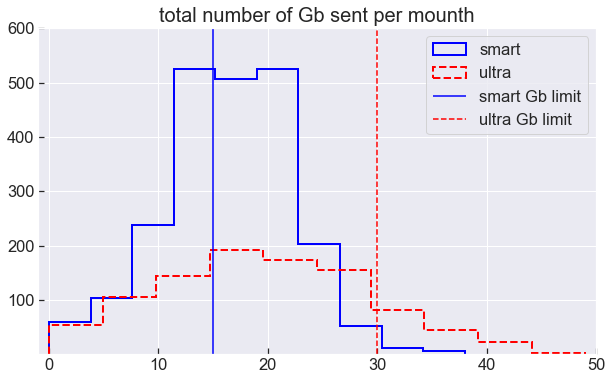

In [67]:
fig, ax = plt.subplots()

# space = np.linspace(0, 1750, 15)

ax.hist(smart_web_stat_df['Gb_count'], histtype='step',
        color='blue', lw=2, label='smart')
ax.hist(ultra_web_stat_df['Gb_count'], histtype='step',
        color='red', lw=2, ls='--', label='ultra')

ax.set_title('total number of Gb sent per mounth', fontsize=20)

ax.vlines(smart_web_limit, 0, 1e3, color='blue',
          label='smart Gb limit')
ax.vlines(ultra_web_limit, 0, 1e3, color='red', ls='--',
          label='ultra Gb limit')

ax.legend()
# ax.set_xscale('log')

ax.set_xlim(-1, 50)
ax.set_ylim(.1, 600)

plt.show()

- Ограничения по веб-трафику превышают пользователи обоих тарифов

### 3.4 Общая выручка по месяцам

In [46]:
from functools import reduce

In [47]:
smart_calls_stat_df

calls_count  total_duration  minutes_left  minutes_over  \
user_id month                                                            
1001    11              59             430            70             0   
        12              63             414            86             0   
1002    6               15             117           383             0   
        7               26             214           286             0   
        8               42             289           211             0   
...                    ...             ...           ...           ...   
1498    10              41             247           253             0   
1499    9                9              70           430             0   
        10              68             449            51             0   
        11              74             612          -112           112   
        12              69             492             8             0   

               call_overpay  
user_id month                
1001    11                0  
        12                0  
1002    6                 0  
        7                 0  
        8                 0  
...                     ...  
1498    10                0  
1499    9                 0  
        10                0  
        11              336  
        12                0  

[2223 rows x 5 columns]

In [48]:
smart_sms_stat_df

sms_count  sms_left  sms_over  sms_overpay
user_id month                                            
1002    6              4        46         0            0
        7             11        39         0            0
        8             13        37         0            0
        9              4        46         0            0
        10            10        40         0            0
...                  ...       ...       ...          ...
1498    10            42         8         0            0
1499    9             11        39         0            0
        10            48         2         0            0
        11            59        -9         9           27
        12            66       -16        16           48

[1922 rows x 4 columns]

In [49]:
smart_web_stat_df

session_count  mb_month  Gb_count  Gb_left  Gb_overpay
user_id month                                                        
1001    11                55  18429.34        18        3           0
        12                41  14036.66        14       -1         200
1002    6                 34  10856.82        11       -4         800
        7                 58  17580.10        18        3           0
        8                 60  20319.26        20        5           0
...                      ...       ...       ...      ...         ...
1498    10                59  20579.36        21        6           0
1499    9                  5   1845.75         2      -13        2600
        10                58  17788.51        18        3           0
        11                49  17963.31        18        3           0
        12                45  13055.58        13       -2         400

[2228 rows x 5 columns]

In [56]:
smart_overpay_list = [smart_calls_stat_df['call_overpay'], smart_sms_stat_df['sms_overpay'], smart_web_stat_df['Gb_overpay']]
ultra_overpay_list = [ultra_calls_stat_df['call_overpay'], ultra_sms_stat_df['sms_overpay'], ultra_web_stat_df['Gb_overpay']]

In [57]:
smart_count_list = [smart_calls_stat_df['calls_count'], smart_sms_stat_df['sms_count'], smart_web_stat_df['Gb_count']]
ultra_count_list = [ultra_calls_stat_df['calls_count'], ultra_sms_stat_df['sms_count'], ultra_web_stat_df['Gb_count']]

In [71]:
def merger(df_list, stat=False, stat_colname='total_overpay'):

    merged_dfs = reduce(lambda  left,right: pd.merge(left, right, left_index=True,
                                                     right_index=True, how='outer'),
                                                     df_list)

    if stat:
        merged_dfs[stat_colname] = merged_dfs.sum(axis=1)

    return merged_dfs

In [73]:
smart_overpay_dfs_merged = merger(smart_overpay_list, stat=True)

smart_overpay_dfs_merged

call_overpay  sms_overpay  Gb_overpay  total_overpay
user_id month                                                      
1001    11              0.0          NaN         0.0            0.0
        12              0.0          NaN       200.0          200.0
1002    6               0.0          0.0       800.0          800.0
        7               0.0          0.0         0.0            0.0
        8               0.0          0.0         0.0            0.0
...                     ...          ...         ...            ...
1498    10              0.0          0.0         0.0            0.0
1499    9               0.0          0.0      2600.0         2600.0
        10              0.0          0.0         0.0            0.0
        11            336.0         27.0         0.0          363.0
        12              0.0         48.0       400.0          448.0

[2229 rows x 4 columns]

In [74]:
ultra_overpay_dfs_merged = merger(ultra_overpay_list, stat=True)

ultra_overpay_dfs_merged

call_overpay  sms_overpay  Gb_overpay  total_overpay
user_id month                                                      
1000    5               0.0          0.0      4050.0         4050.0
        6               0.0          0.0      1050.0         1050.0
        7               0.0          0.0      2400.0         2400.0
        8               0.0          0.0      2400.0         2400.0
        9               0.0          0.0      2250.0         2250.0
...                     ...          ...         ...            ...
1495    8               0.0          0.0      4050.0         4050.0
        9               0.0          0.0         0.0            0.0
        10              0.0          0.0       150.0          150.0
        11              0.0          0.0         0.0            0.0
        12              0.0          0.0      1050.0         1050.0

[985 rows x 4 columns]

In [75]:
smart_count_dfs_merged = merger(smart_count_list)

smart_count_dfs_merged

# smart_count_list
# ultra_count_list

calls_count  sms_count  Gb_count
user_id month                                  
1001    11            59.0        NaN      18.0
        12            63.0        NaN      14.0
1002    6             15.0        4.0      11.0
        7             26.0       11.0      18.0
        8             42.0       13.0      20.0
...                    ...        ...       ...
1498    10            41.0       42.0      21.0
1499    9              9.0       11.0       2.0
        10            68.0       48.0      18.0
        11            74.0       59.0      18.0
        12            69.0       66.0      13.0

[2229 rows x 3 columns]

In [80]:
smart_count_dfs_merged.groupby(level=1).agg(['mean', 'var', 'std'])

calls_count                         sms_count                         \
             mean         var        std       mean         var        std   
month                                                                        
1       27.676471  433.134581  20.811886  20.000000  252.133333  15.878707   
2       40.189655  644.858137  25.394057  27.940000  440.465714  20.987275   
3       54.324675  652.116883  25.536579  35.550725  669.780477  25.880117   
4       51.312500  660.739302  25.704850  35.864583  517.865680  22.756662   
5       55.241135  643.984296  25.376846  39.032787  638.775776  25.274014   
6       55.889571  554.592668  23.549791  38.577465  731.635801  27.048767   
7       56.726368  606.619751  24.629652  38.988506  719.352468  26.820747   
8       59.230769  622.667547  24.953307  38.750000  767.213054  27.698611   
9       59.776062  613.515549  24.769246  39.219731  702.505555  26.504821   
10      60.167235  629.749334  25.094807  39.082677  736.503019  27.138589   
11      61.698413  604.962896  24.595993  39.881481  711.361366  26.671359   
12      66.684524  707.273312  26.594611  42.264808  832.447114  28.852160   

        Gb_count                       
            mean        var       std  
month                                  
1       8.735294  39.412656  6.277950  
2      11.844828  37.150938  6.095157  
3      15.233766  32.549897  5.705252  
4      13.625000  31.299550  5.594600  
5      15.907801  34.370010  5.862594  
6      15.951220  31.911716  5.649046  
7      15.875622  33.419453  5.780956  
8      16.807692  28.962859  5.381715  
9      16.392308  25.884110  5.087643  
10     16.880952  32.897042  5.735594  
11     17.000000  27.180952  5.213535  
12     18.201780  29.786544  5.457705

In [76]:
ultra_count_dfs_merged = merger(ultra_count_list)

ultra_count_dfs_merged

calls_count  sms_count  Gb_count
user_id month                                  
1000    5             22.0       22.0       3.0
        6             43.0       60.0      23.0
        7             47.0       75.0      14.0
        8             52.0       81.0      14.0
        9             58.0       57.0      15.0
...                    ...        ...       ...
1495    8             17.0       13.0       3.0
        9            112.0       82.0      33.0
        10           152.0       82.0      29.0
        11           129.0       79.0      39.0
        12           155.0       84.0      23.0

[985 rows x 3 columns]

In [69]:
print(smart_calls_stat_df['call_overpay'].isin(smart_overpay_dfs_merged['call_overpay']).sum())
print(smart_calls_stat_df.shape[0])

print(smart_sms_stat_df['sms_overpay'].isin(smart_overpay_dfs_merged['sms_overpay']).sum())
print(smart_sms_stat_df.shape[0])

print(smart_web_stat_df['Gb_overpay'].isin(smart_overpay_dfs_merged['Gb_overpay']).sum())
print(smart_web_stat_df['Gb_overpay'].shape[0])

2223
2223
1922
1922
2228
2228


In [70]:
print(ultra_calls_stat_df['call_overpay'].isin(ultra_overpay_dfs_merged['call_overpay']).sum())
print(ultra_calls_stat_df.shape[0])

print(ultra_sms_stat_df['sms_overpay'].isin(ultra_overpay_dfs_merged['sms_overpay']).sum())
print(ultra_sms_stat_df.shape[0])

print(ultra_web_stat_df['Gb_overpay'].isin(ultra_overpay_dfs_merged['Gb_overpay']).sum())
print(ultra_web_stat_df['Gb_overpay'].shape[0])

951
951
795
795
975
975


In [128]:
users_df[['tariff']].value_counts(normalize=True)

tariff
smart     0.702
ultra     0.298
dtype: float64